# Perfromance metric of Online dictionary learning based on sparse coding on letter trajectory dataset using K-means 
#### Author : Hedi Fendri 
#### Supervisor : Sylvain calinon 
#### Copyrights (c) : IDIAP Research Institute

## Introduction:  
After implementing the algorithm of the online dictionary learning based on sparse coding using the letter trajectory dataset. We need to evaluate the performance of our implementation. This can be done by applying a clustering algorithm to the learnt filter h and see if this allow us to group first the same letters in the same cluster and second the letters that share the same dictionary. 

### Importing librairies 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.io
from sklearn import preprocessing


### Importing the learnt filter from MATLAB

In [2]:
data = scipy.io.loadmat('data/filter_h_speed.mat')
with open("dataset_letters.txt") as f:
    label = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
label = [x.strip() for x in label] 
le = preprocessing.LabelEncoder()
le.fit(label)
label_e=le.transform(label)
data=data['h']

### Data visualization 

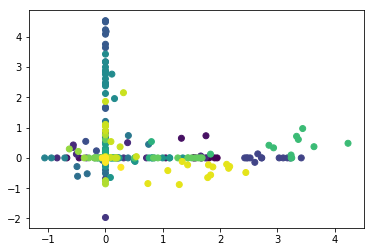

In [3]:

plt.scatter(data[0,:], data[1,:],c=label_e)
plt.show()

### Preprocessing step and PCA

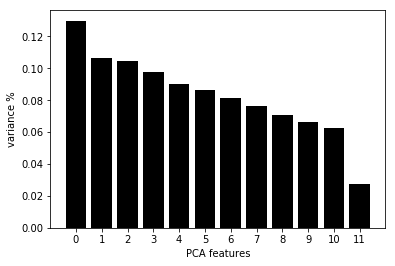

In [4]:
X_std = preprocessing.StandardScaler().fit_transform(data.T)
# Create a PCA instance: pca
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [5]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12989684, 0.2364754 , 0.34137391, 0.43882293, 0.52913195,
       0.61541305, 0.69691441, 0.77344027, 0.84388198, 0.91016657,
       0.97249817, 1.        ])

let's take only the first 7 principal components since they explain more than 80 % of the data

Text(0.5,0,'PCA 3')

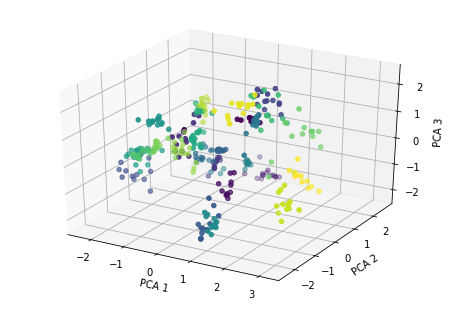

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(PCA_components[0], PCA_components[1],PCA_components[2], c=label_e)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

### finding the optimal number of clusters

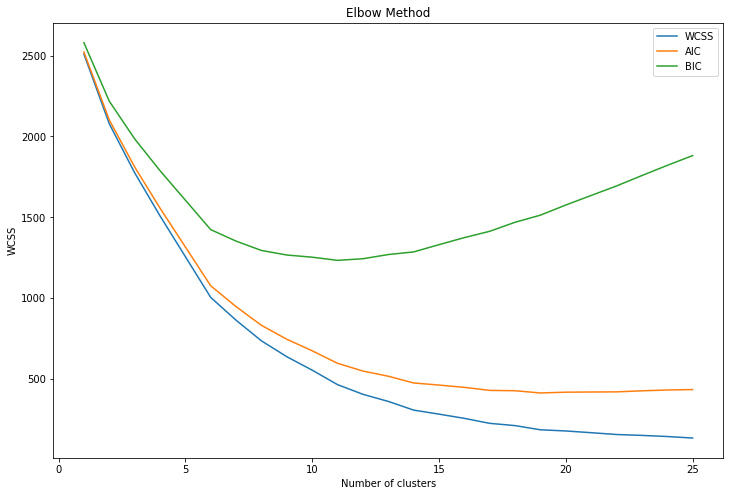

In [7]:
wcss = []
aic=[]
bic=[]
for i in range(1, 26):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    kmeans.fit(PCA_components.iloc[:,:6])
    wcss.append(kmeans.inertia_)
    aic.append(kmeans.inertia_+i*data.shape[0])
    bic.append(kmeans.inertia_+i*data.shape[0]*np.log(data.shape[1]))
plt.figure("K optimization for k means",figsize=(12,8))
plt.plot(range(1, 26), wcss,label='WCSS')
plt.plot(range(1,26),aic,label='AIC')
plt.plot(range(1,26),bic,label='BIC')
plt.legend()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
k_min_aic=np.argmin(aic)
k_min_bic=np.argmin(bic)
print("Optimal k using aic metric is ",k_min_aic)
print("Optimal k using bic metric is ",k_min_bic)
k_best=min(k_min_aic,k_min_bic)
print("BEST K=",k_best)

Optimal k using aic metric is  18
Optimal k using bic metric is  10
BEST K= 10


### Fitting the kmeans with the best number of clusters

In [56]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(PCA_components.iloc[:,:6])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
y_kmeans = kmeans.predict(PCA_components.iloc[:,:6])


In [58]:
label=np.array(label)

In [59]:
lables_cluster=[]
for i in np.unique(y_kmeans):
    lables_cluster.append(label[np.where(y_kmeans==i)[0]])

In [61]:
lables_cluster[0]

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'E', 'J', 'J', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L', 'L', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W'], dtype='<U1')

In [15]:
pd.plotting.parallel_coordinates(lables_cluster, 'cluster')


TypeError: list indices must be integers or slices, not str